In [27]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from str_mutation_functions import *

Populating the interactive namespace from numpy and matplotlib


/Users/melissagymrek/opt/miniconda3/envs/r-environment/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Exploring Tandem Repeat Mutation models

This notebook uses functions defined in `str_mutation_functions.py` to simulate allele frequencies using different STR mutation parameters.

Key parameters:
* mu: Per-generation mutation rate of the central allele
* L: Length-dependent mutation rate parameter (slope of the increase of log mutation rate with allele size)
* beta: length constraint
* p: step size parameter (geometric distribution)
* num_alleles: Size of transition matrix to build. Bigger = more accurate but slower.

Simulating mu=1e-08 beta=0.1 p=0.9 L=0
Simulating mu=0.001 beta=0.1 p=0.9 L=0
Simulating mu=0.001 beta=0.1 p=0.8 L=0.8


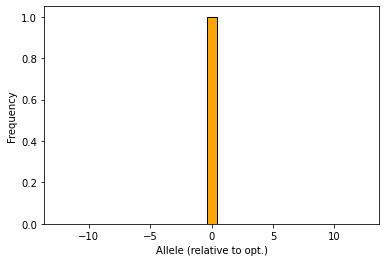

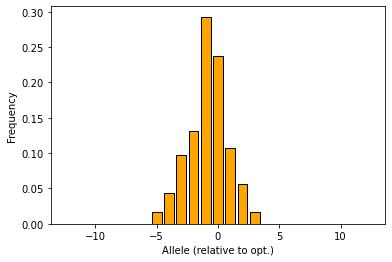

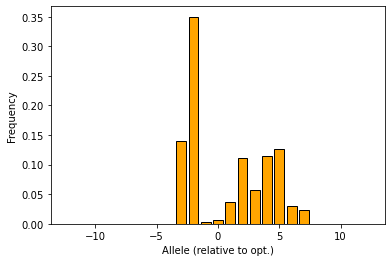

In [28]:
######### Settings used in figure 2 ############
import numpy as np
np.random.seed(12345)

num_alleles = 25
N_e = 10000
max_iter = 50000
end_samp_n = 1000
p = 0.9
beta = 0.1

# Setting 1 - low mutation rate
mu = 10e-9
L = 0
afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
PlotAfreqs(afreqs, "Fig2_%s_%s_%s_%s_%s_%s_%s_%s.pdf"%(mu, L, p, beta, N_e, max_iter, end_samp_n, num_alleles))

# Setting 2 - high mutation rate
mu = 10e-4
L = 0
afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
PlotAfreqs(afreqs, "Fig2_%s_%s_%s_%s_%s_%s_%s_%s.pdf"%(mu, L, p, beta, N_e, max_iter, end_samp_n, num_alleles))

# Setting 3 - length-dependent mutation rate
mu = 10e-4
L = 0.8
p = 0.8
afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
PlotAfreqs(afreqs, "Fig2_%s_%s_%s_%s_%s_%s_%s_%s.pdf"%(mu, L, p, beta, N_e, max_iter, end_samp_n, num_alleles))

Simulating mu=1e-07 beta=0.4 p=0.9 L=0
Simulating mu=1e-05 beta=0.4 p=0.9 L=0
Simulating mu=0.01 beta=0.4 p=0.9 L=0
Simulating mu=1e-07 beta=0.4 p=0.9 L=0
Simulating mu=1e-05 beta=0.4 p=0.9 L=0
Simulating mu=0.01 beta=0.4 p=0.9 L=0
Simulating mu=1e-07 beta=0.4 p=0.9 L=0
Simulating mu=1e-05 beta=0.4 p=0.9 L=0
Simulating mu=0.01 beta=0.4 p=0.9 L=0


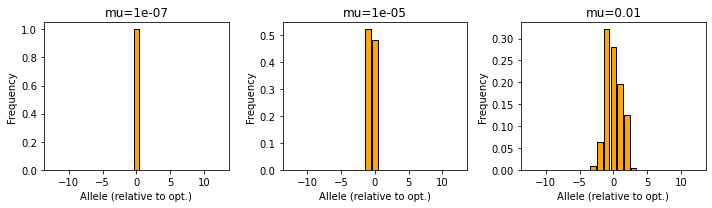

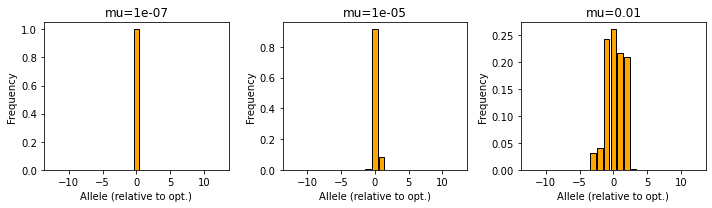

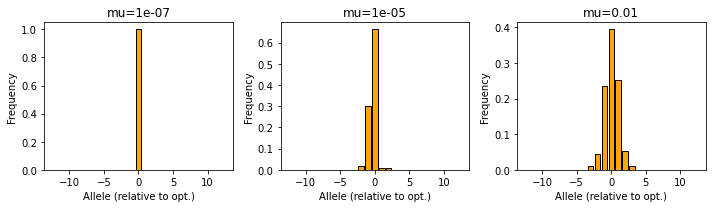

In [29]:
####### Effect of mutation rate ########
np.random.seed(12345)

num_alleles = 25
N_e = 10000
max_iter = 50000
end_samp_n = 1000
p = 0.9
beta = 0.4
L = 0

for nsim in range(3):
    fig = plt.figure()
    fig.set_size_inches((10, 3))
    ind = 1
    for mu in [10e-8, 10e-6, 10e-3]:
        ax = fig.add_subplot(1, 3, ind)
        afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
        PlotAfreqs(afreqs, ax=ax, title="mu=%s"%mu)
        ind += 1
    fig.tight_layout()

Simulating mu=0.001 beta=0 p=0.9 L=0
Simulating mu=0.001 beta=0.2 p=0.9 L=0
Simulating mu=0.001 beta=0.5 p=0.9 L=0
Simulating mu=0.001 beta=0 p=0.9 L=0
Simulating mu=0.001 beta=0.2 p=0.9 L=0
Simulating mu=0.001 beta=0.5 p=0.9 L=0
Simulating mu=0.001 beta=0 p=0.9 L=0
Simulating mu=0.001 beta=0.2 p=0.9 L=0
Simulating mu=0.001 beta=0.5 p=0.9 L=0


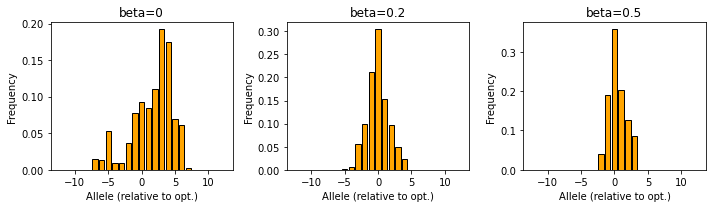

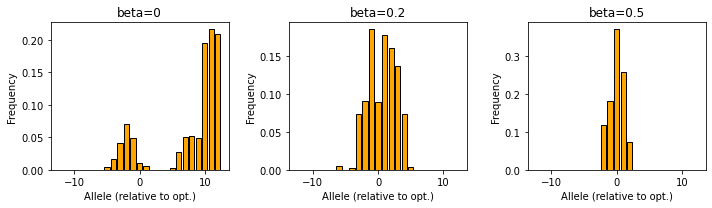

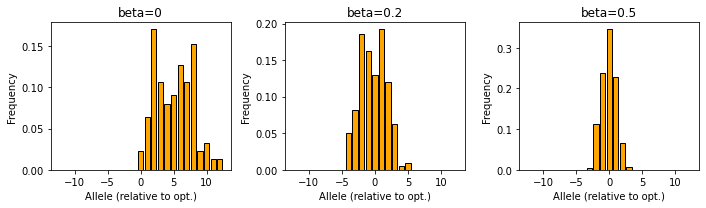

In [30]:
####### Effect of beta ########
np.random.seed(12345)

num_alleles = 25
N_e = 10000
max_iter = 50000
end_samp_n = 1000
p = 0.9
beta = 0.4
L = 0
mu = 10e-4

for nsim in range(3):
    fig = plt.figure()
    fig.set_size_inches((10, 3))
    ind = 1
    for beta in [0, 0.2, 0.5]:
        ax = fig.add_subplot(1, 3, ind)
        afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
        PlotAfreqs(afreqs, ax=ax, title="beta=%s"%beta)
        ind += 1
    fig.tight_layout()

Simulating mu=0.001 beta=0.3 p=1 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.6 L=0
Simulating mu=0.001 beta=0.3 p=1 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.6 L=0
Simulating mu=0.001 beta=0.3 p=1 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.6 L=0


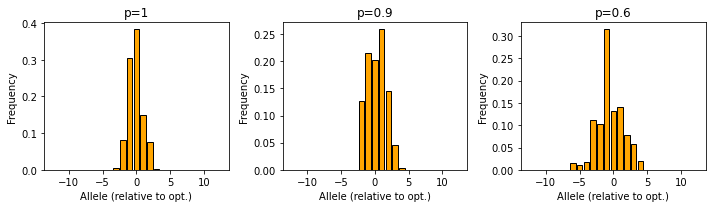

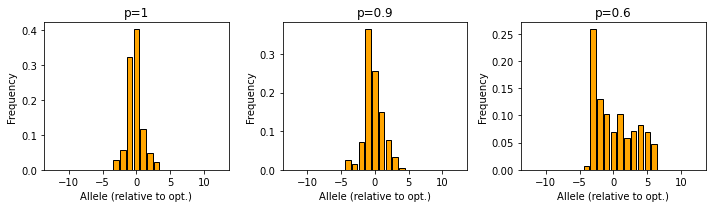

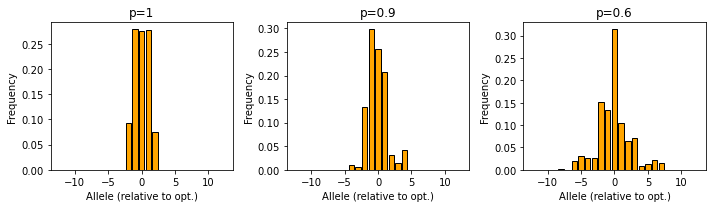

In [31]:
####### Effect of step size ########
np.random.seed(12345)

num_alleles = 25
N_e = 10000
max_iter = 50000
end_samp_n = 1000
beta = 0.4
L = 0
mu = 10e-4
beta = 0.3

for nsim in range(3):
    fig = plt.figure()
    fig.set_size_inches((10, 3))
    ind = 1
    for p in [1, 0.9, 0.6]:
        ax = fig.add_subplot(1, 3, ind)
        afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
        PlotAfreqs(afreqs, ax=ax, title="p=%s"%p)
        ind += 1
    fig.tight_layout()

Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0.5
Simulating mu=0.001 beta=0.3 p=0.9 L=1
Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0.5
Simulating mu=0.001 beta=0.3 p=0.9 L=1
Simulating mu=0.001 beta=0.3 p=0.9 L=0
Simulating mu=0.001 beta=0.3 p=0.9 L=0.5
Simulating mu=0.001 beta=0.3 p=0.9 L=1


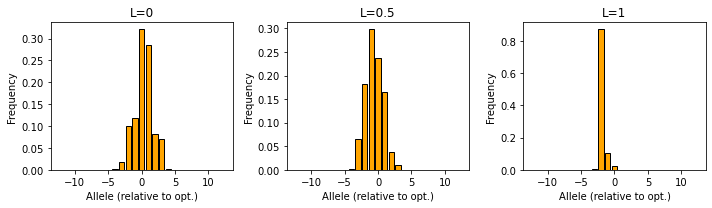

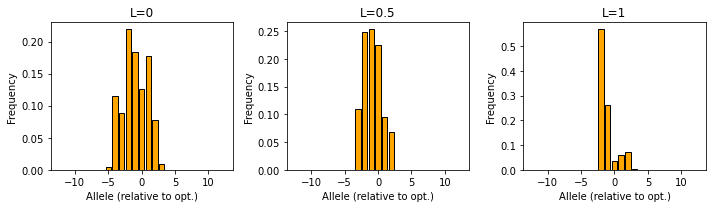

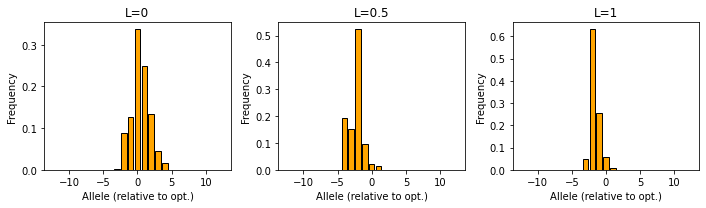

In [32]:
####### Effect of L ########
np.random.seed(12345)

num_alleles = 25
N_e = 10000
max_iter = 50000
end_samp_n = 1000
p = 0.9
beta = 0.4
mu = 10e-4
beta = 0.3

for nsim in range(3):
    fig = plt.figure()
    fig.set_size_inches((10, 3))
    ind = 1
    for L in [0, 0.5, 1]:
        ax = fig.add_subplot(1, 3, ind)
        afreqs = Simulate(num_alleles, N_e, mu, beta, p, L, max_iter, end_samp_n)
        PlotAfreqs(afreqs, ax=ax, title="L=%s"%L)
        ind += 1
    fig.tight_layout()